# Solutions to Applied Statistics Assessment

In [1]:
# Mathematical functions from the standard library
import math

# Permutations and combinations
import itertools

# Random selections
import random

# Numerical structures and applications
import numpy as np

# Plotting
import matplotlib.pyplot as plt

## Introduction

## Problem 1: Extending the Lady Tasting Tea Experiment

### __Brief__ 

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### Background

The lady tasting tea is a famous statistical experiment devised by [Ronald A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) to investigate a woman's claim that she could distinguish whether milk was poured first into a cup of tea or if the tea was poured in first. This [Irish TImes article](https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786) provides a easy to understand explanation of the lady tasting tea experiment for the non-statistician.

In the original experiment eight cups of tea were presented to the lady - four with milk first and four with tea first. They were identical in all other respects and were presented in a _random_ order. Fisher aimed to calculate the probability, _p_ that the lady was selecting the four milk first cups purely by chance.

[Probability](https://statisticsbyjim.com/probability/probability-fundamentals/), ``p-value`` is the measure of likelihood of an event occurring, expressed as a value between 0 and 1, where 0 is impossible and 1 is certain. 

As part of this experiment, Fisher introduced the ``null hypothesis``, _H<sub>0</sub>_ and the ``alternative hypothesis``,  _H<sub>a</sub>_. The null hypothesis is the default position and is assumed to be true unless proven otherwise. The alternative hypothesis opposes the null hypothesis and assumes a relationship between the variables. As stated in this article, [Alternative Hypothesis: Definition, Types and Examples](https://www.geeksforgeeks.org/maths/alternative-hypothesis-definition-types-and-examples/)  
>"The null and alternative hypotheses are exhaustive, meaning that together they cover every possible outcome. They are also mutually exclusive, meaning that only one can be true at a time".

For the original lady tasting tea experiment the null hypothesis and the alternative hypothesis are as follows:

>__Null Hypothesis _H<sub>0</sub>_:__
>
>* The lady has no special powers to tell the difference between cups of tea with milk in first and cups of tea with tea in first.
>* The lady is selecting the four cups from eight at random.
>
>__Alternative Hypothesis _H<sub>a</sub>_:__
>* The lady can tell the difference. 


At the outset of the experiment Fisher also chose a ``significance level``, α of 0.05. As he states in page 13 of [The Design of Experiments](https://home.iitk.ac.in/~shalab/anova/DOE-RAF.pdf): 
>"It is open to the experimenter to be more or less exacting in respect of the smallness of the probability he would require before he would be willing to admit that his observations have demonstrated a positive result". 

[Significance level](https://statisticsbyjim.com/glossary/significance-level/):
> The significance level, also known as alpha or α, is a measure of the strength of the evidence that must be present in your sample before you will reject the null hypothesis and conclude that the effect is statistically significant. The probability of rejecting the null hypothesis when it is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Lower significance levels indicate that you require stronger evidence before you will reject the null hypothesis.

* If __p ≤ α__ reject the null hypothesis in favour of the alternative hypothesis.
* If __p > α__ do not reject the null hypothesis.


type 1 error: false positive
type 2 error: false negative

5% risk of concluding that a difference exists when there is no actual difference.

Statistical significance indicates that an effect you observe in a sample is unlikely to be the product of chance. For statistically significant results, you can conclude that an effect you observe in a sample also exists in the population. 

``Randomisation`` of the order of the cups and the order in which the cups were presented to the lady is a key component of the experiment. In the [The historical and statistical significance of the lady tasting tea experiment](https://jyyna.co.uk/lady-tasting-tea/) the author notes that 

>"The randomization of the order of cups was crucial to prevent any bias or pattern recognition that could influence the results." 

Randomisation eliminates selection bias which ensures that each cup has an equal chance of being selected and facilitates statistical analysis as statistical tests assume randomness. As an aside, the author replicated the experiment with his friends - none of them could match the lady's accuracy!

[Combinatorial maths](https://www.geeksforgeeks.org/engineering-mathematics/combinatorics/) is used to calculate the probability of the lady selecting at random the four milk in first cups from eight cups. The [class lecture notes by Ian McLoughlin](https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb) provides a more detailed explanation of how to perform this calculation with Python.

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

where:
* ${n}$ is the total number of cups 
* ${k}$ is the number of cups with milk in first. 

$$ \binom{8}{4} = \frac{8!}{4!(8-4)!} $$

Using this equation the probability, _p_ of correctly identifying at random all four milk first cups, where ${n}$ is 8 and ${k}$ is 4 is 1/70. 

$$p = \frac{1}{70} \approx 0.014$$

In other words, if she is choosing at random, she has a one in seventy chance or a probability of 0.014 of correctly selecting the four cups with milk in first. 

As this p-value, 0.014 is less than the significance level, 0.05 we can reject the null hypothesis in favour of the alternative hypothesis.

As the lady correctly selected all four milk first cups we can say that she can indeed detect if milk or tea has been poured first into the cup. 

### Solution

The problem requires the use of numpy to simulate the experiment of choosing four cups of milk in first tea from twelve cups of tea. 

* __Define the null hypothesis, the alternative hypothesis and the significance level.__
  
   >__Null Hypothesis _H<sub>0</sub>_:__
   >* The lady has no special powers to tell the difference between cups of tea with milk in first and cups of tea with tea in first.
   >* The lady is selecting the four cups from twelve at random.
   >

   >__Alternative Hypothesis _H<sub>a</sub>_:__
   >* The lady can tell the difference. 
   >

   >__Significance level, α:__ 0.05

* Set the number of times to simulate the experiment. 
   
   As the brief says 'many times', I chose to repeat the experiment 10,000,000 times. This will give a more accurate estimate of the probability.   Repetition reduces the 

In [27]:
# Number of simulation runs.
num_simulations = 10_000_000

* Set up a counter to track the number of successful outcomes. 

In [28]:
# Counter for the number of times the guess matches the milk in first selection.
success = 0

The following steps will be repeated by the number of simulation runs. 

* __Create cup labels:__
  
  Set up a numpy array with 12 labels from 0 to 11 inclusive with ``numpy.arange()``. The [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) for numpy.arange() states that it returns an array of evenly spaced values within a given interval.  This array will represent the labels on the twelve cups. The stop value is excluded from the array. 
 
   ```python
   numpy.arange([start, ]stop, [step, ]dtype=None)
   ```

In [29]:
# Create an array of 12 values from 0 to 11 inclusive. 
demo = np.arange(12)
demo

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

* __Shuffle the labels:__ 

   The brief states that the arrays must be shuffled many times. This is accomplished using [numpy.random.shuffle()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html) which randomly shuffles the labels. This function modifies the array in place, so each run may produce a different permutation. 

In [30]:
# Shuffle an array.
np.random.shuffle(demo)
demo

array([ 2,  8,  1,  0,  9,  7,  6, 11,  4,  5,  3, 10])

* __Select cups for milk in first:__
   
  Choose four labels from the cups array to be milk in first. 

   To choose four cups from the array, the function ``numpy.random.choice()`` was used. The [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) states that ``numpy.random.choice()`` generates a random sample from a given 1-D array.
   
   It has three parameters:

   ```python 
   numpy.random.choice(a, size=None, replace=True, p=None)
   ```
    
   * __a:__ the array to sample from

   * __size:__ the number of elements to select (4)

   * __replace:__ either True or False. 
    
   If the ``replace = True``, the function samples with replacement. This is the default.
   
   For this experiment ``replace = False`` as we want to sample without replacement. Once a cup is chosen, it is not replaced back into the array. 


   The array is sorted in ascending order with [np.sort()](https://numpy.org/doc/stable/reference/generated/numpy.sort.html), which returns a sorted copy of an array. This will make the comparison step between the two arrays simpler as the position of the element matters when comparing arrays.

In [31]:
# Select a random sample from np.arange(5) of size 3. Sample with replacement is the default. 
np.random.choice(5, 3, replace=True)

array([4, 4, 0])

As demonstrated above with replace = True the same value can be selected more than once. 

In [32]:
# Select a random sample from np.arange(5) of size 3 with sampling without replacement.
np.random.choice(5, 3, replace = False)

array([0, 1, 4])

Each value can only appear once when sampling without replacement. 

In [33]:
# Values are chosen and the array is sorted inplace. 
np.sort(np.random.choice(5, 3, replace = False))

array([0, 2, 3])

* __Select the guess:__
  
  In the next step, four cups are randomly selected to represent the guess of which four cups are milk first. The functions ``numpy.random.choice()`` and ``numpy.sort()`` are used again to randomly select and then sort four labels from the cups array. 

* __Compare results:__ 
 
Compare the milk first array with the guess array using ``numpy.array_equal()``. This function [numpy.array_equal()](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html) compares two arrays elementwise, which is why both arrays are sorted in ascending order using ``np.sort()`` in the previous steps. It returns ``True`` if the two arrays have the same shape and elements. 

```python
numpy.array_equal(a1, a2, equal_nan=False)[source] where a1 and a2 are the arrays
```

The different methods to compare arrays is discussed in this question on [stackoverflow](https://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise). Other suggested methods included use of ``numpy.all()`` and ``numpy.equiv()``.

In [34]:
# Two arrays with identical labels but in different positions.
a1 = [1, 2, 3, 4, 5]
a2 = [1, 2, 3, 5, 4]

np.array_equal(a1, a2)

False

In [35]:
# Two arrays with identical labels and postions.
a1 = [1, 2, 3, 4, 5]
a2 = [1, 2, 3, 4, 5]

np.array_equal(a1, a2)

True

* __Record success:__ 
  
  If the arrays match, record the result as success. A success occurs when the four guessed cups match the four milk first cups. 

* __Repeat the process__.

Repeat the above process of creating the array of 12 cups, shuffle the array, select four milk first cups, guess which cups are milk first and compare the guess array with the milk first array. 

In [36]:
# Run the simulation multiple times to calculate the frequency of successful outcomes.
for _ in np.arange(num_simulations):
    # Create an array representing 12 cups labeled 0-11 inclusive.
    cups = np.arange(0, 12)

    # Randomly shuffle the cups.
    np.random.shuffle(cups)

    # Randomly choose 4 cups that have milk added first. Sample without replacement.
    # Sort the array.
    milk_first_cups = np.sort(np.random.choice(cups, size = 4, replace = False))

    # Randomly guess which cups have milk added first. Sample without replacement.
    # Sort the array.
    guess = np.sort(np.random.choice(cups, size = 4, replace= False))
    
    # If the guess matches the milk selection, count it as a success.
    if np.array_equal(milk_first_cups, guess):
        success += 1

In [37]:
# Show the number of successful outcomes. 
f'There were {success} of successful outcomes from {num_simulations} simulations.'

'There were 20373 of successful outcomes from 10000000 simulations.'

* Calculate the probability with the following formula:
 
    $$p = \frac{success}{no. of simulations}$$

In [38]:
# Calculate the probability of success.
probability = success/num_simulations
print(f'The probability of the lady correctly selecting the four milk first cups from twelve cups is: {probability}.')

The probability of the lady correctly selecting the four milk first cups from twelve cups is: 0.0020373.


The probability of the lady correctly selecting the four milk first cups from twelve by random guessing is 0.002 or a 2 in a 1000 chance. This compares to a probability of 0.014 for the original eight cup experiment. Since the probability is below the significance level (α = 0.05), there is sufficient evidence to reject the null hypothesis if the lady does correctly identify the four milk first cups. We can then conclude that the lady can tell the difference between the milk first and tea first cups. 

The final part of this problem is to consider extending or relaxing the p-value threshold compared to the original design. Choosing the significance level at the outset of the experiment is a key component of making a statistical analysis. I would neither extend nor relax the p-value threshold based on the results of the experiment! The question of whether it is ever good to increase the significance level was posed on [stackexchange.com](https://stats.stackexchange.com/questions/24203/is-it-ever-good-to-increase-significance-level):

> "Suppose you are using α=0.01 as the significance level. If you are not getting significant results, is it better to increase the significance level to α=0.05?" 

I really like the reply given by one of the respondents: 

> A farmer had lots of targets painted on the side of his barn with bullet holes perfectly centred in the bullseye. As he explained, "I shoot first and paint the target afterwards." – 
Dilip Sarwate CommentedMar 6, 2012 at 20:33

Changing the significance level to decide what is statistically significant after the experiment is never good practice. The practice of manipulating data or statistical analyses to find statistically significant results is called [p-hacking](https://statisticsbyjim.com/hypothesis-testing/p-hacking/) or [data dredging](https://en.wikipedia.org/wiki/Data_dredging).

Now, could I have give more consideration to extending or relaxing the threshold level compared to the original experiment at the start of the modified experiment? Possibly. The most commonly used significance levels are 0.05 and 0.01. The choice of the significance level can be influenced by the consequences of the result of false positive or false negative values. An example of this is given in this article, [Understanding Significance Levels](https://www.statsig.com/blog/understanding-significance-levels-a-key-to-accurate-data-analysis) where in fields like medicine false negatives can have serious consequences. 


![p-value](img\p-value.jpg)

_Credit https://www.simplypsychology.org/p-value.html_





https://statistics.laerd.com/statistical-guides/hypothesis-testing-3.php

The p-value is defined as the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct. A small p-value means that 
https://en.wikipedia.org/wiki/P-value

https://statisticsbyjim.com/hypothesis-testing/interpreting-p-values/

https://www.investopedia.com/terms/p/p-value.asp

***

## Problem 2: Normal Distribution

### __Brief__

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### __Background__

__Normal Distribution__

A normal distribution is a type of continuous probability distribution for a real-valued random variable (https://en.wikipedia.org/wiki/Normal_distribution). It is a good model for predicting and understanding real-world data as it describes the distributions of values for many real-world phenomena. 

The distribution follows a symmetrical, bell-shaped curve that measures the probability of seeing a particular value. The apex of the curve is the mean, $\mu$, of the values, and the standard deviation, $\sigma$, measures the spread of the values. The total area under the curve is exactly 1. 

A standard normal distribution is a special type of the normal distribution with a mean, $\mu$ = 0, and a standard deviation, $\sigma$ = 1. Many statistical tests rely on the values being transformed into or assumed to follow the standard normal distribution. Transforming values into a standard normal distribution, in a process called standardisation, makes it easier to compare values from different distributions. This distribution is also known as the Z-distribution. 

This diagram from Geeksforgeeks.org illustrates the difference between a normal distribution and a standard normal distribution.

![Plot of normal distribution and standard normal distribution](img/normal_distribution.png)

_Credit https://www.geeksforgeeks.org/maths/standard-normal-distribution/_

[Z-Scores, Standardization, and the Standard Normal Distribution (5.3)](https://www.youtube.com/watch?v=2tuBREK_mgE)

Socratica.com [Normal distributions explained - with real world examples](https://www.youtube.com/watch?v=xlxaa9YhT6A)

__The Mean__

The mean is the average of a set of numbers.

$$
\mu = \frac{\sum\limits_{i=1}^{N} x_i}{n}
$$

Where:

- $\mu$ = mean
- $x_i$ = each observed value
- $n$ = the number of observations

Numpy has the [numpy.mean() function](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to calculate the mean along a specified axis. If no axis is specified, the default is to calculate the mean of the flattened array. 

In [2]:
# Calculate the mean of a list of numbers. 
data = [1, 2, 3, 4, 5]

mean = np.mean(data)
print(mean)

3.0


__The Standard Deviation__

Standard deviation measures how spread out the data points are. Wikipedia defines [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) as:

>The standard deviation is a measure of the amount of variation of the values of a variable about its mean.

A small standard deviation indicates that the values are very close to and clustered about the mean. 

A large standard deviation indicates that the values have a wide spread about the mean.

In a normal distribution, the empirical rule, or the 68-95-99.7 rule, tells us how data are spread around the mean:
* About 68% of observations will fall within the first standard deviation ($\mu ± \sigma$)  of the mean
* About 95% within the first two standard deviations ($\mu ± 2\sigma$)
* About 99.7% within the first three standard deviations ($\mu ± 3\sigma$) 


![Diagram depicting the empirical rule](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2021/08/empirical_rule_graph2.png?w=572&ssl=1)

_Image Credit statisticsbyjim.com_

__Population vs Sample Standard Deviation__

The calculation of standard deviation depends on whether the data represent the entire population or just a sample. 

The population standard deviation is used when the values are for the entire population. For example, if we measured the height of every person in a country, we would use the formula for the population standard deviation. As we can only measure the height of a portion of the population, the sample standard deviation is used. The sample standard deviation gives an estimate of the population standard deviation. This page on [Standard Deviation on laerd.com](https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php) contains additional examples on the use of population and sample standard deviation.

__Population Standard Deviation__

$$\sigma = \sqrt\frac{\sum\limits_{i=1}^{N}(x_i - \mu)^2}{N}$$

Where:

- $\sigma$ = population standard deviation
- $x_i$ = each data point
- $\mu$ = population mean
- $N$ = total number of data points


The sample standard deviation is used when the values are a sample of an entire population. 

__Sample Standard Deviation__

$$s = \sqrt\frac{\sum\limits_{i=1}^{N}(x_i - \overline{x})^2}{N - 1}$$

Where:

- $s$ = sample standard deviation
- $x_i$ = each data point
- $\overline{x}$ = sample mean
- $N$ = total number of data points

__Variance and Why the Sample Formula Uses ${N - 1}$__

Another statistic commonly used when examining a distribution is the variance, $\sigma^2$. The standard deviation is the square root of the variance. Variance is based on the square differences between each data point and the mean. Standard deviation can be easier to explain as it has the same unit as the mean.

When working with a sample rather than an entire the formula for sample variance (and sample standard deviation) uses a denominator of ${N - 1}$. This adjustment is called Bessel's correction. Its purpose, as stated in this [reddit article](https://www.reddit.com/r/askscience/comments/km51c/what_exactly_does_bessels_correction_do_when/) is to provide an unbiased estimate of the population variance. If we were to divide by $N$ instead, the resulting estimate would be consistently too small because the sample mean, $\overline{x}$ is calculated from sample data and is therefore closer to the sample points than the true population mean, $\sigma$. With a small sample, the sample mean, $\overline{x}$ is often a poor estimator of the population mean, $\mu$ which artificially shrinks the squared deviations.

This discussion, Intuitive explanation for dividing by $N-1$ when calculating standard deviation? on [stackexchange.com](https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation/3934#3934 ) explains the correction effect of $N-1$. The factor $N-1$ has a larger correctional effect when $N$ is small. As $N$ becomes larger the sample mean is likely to be a good estimator of the population mean. 

This youtube video, [Why dividing by n underestimates the variance?](https://www.youtube.com/watch?v=sHRBg6BhKjI) explains why Bessel's correction is needed.

In short, dividing by ${N - 1}$ compensates for the fact that we are calculating differences from the sample mean instead of the populations mean, otherwise we would consistently underestimate the variance around the population mean.

__Numpy and Standard Deviation__

Numpy has [numpy.std()](https://numpy.org/doc/stable/reference/generated/numpy.std.html) to calculate the standard deviation along the specified axis. 

```python
numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>, mean=<no value>, correction=<no value>)
```

For this problem two parameters axis and ddof are noteworthy.

_Axis:_

The standard deviation for the flattened array is calculated by default if no axis is specified. Axis can also be a tuple of integers to calculate the standard deviation over multiple axis.

* If ``axis = 1`` the standard deviation for each row in the array is returned.
* If ``axis = 0``, the standard deviation for each column is returned. 

_ddof:_

ddof means Delta Degrees of Freedom. These are the values that are free to vary. By default ``ddof = 0`` thus by default np.std() is calculating the population standard deviation.

If we examine the [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) on numpy.std() we see that the divisor used in the calculation is $N - ddof$, where $N$ is the number of elements. If ``ddof = 1``, the divisor is Bessel's correction, $N - 1$.

```python

N = len(a)
d2 = abs(a - mean)**2  # abs is for complex `a`
var = d2.sum() / (N - ddof)  # note use of `ddof`
std = var**0.5

```

In [3]:
# Calculate the population standard deviation. 
std_dev = np.std(data)
print(std_dev)

1.4142135623730951


In [4]:
# Calculate the sample standard deviation. 
std_dev = np.std(data, ddof = 1)
print(std_dev)

1.5811388300841898


__Generating Random Numbers__

Numpy's random.normal()(https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal) generates samples from a normal distribution. 

```python
random.normal(loc=0.0, scale=1.0, size=None)

Where:
- loc = mean
- scale = standard deviation
- size = output shape
```
[How to get normally distributed random numbers with numpy ](https://realpython.com/numpy-random-normal/) discusses how to generate and plot histograms of the random numbers generated with random.normal().

 https://www.datacamp.com/doc/numpy/random-normal Generate a 2D array for simulation. 

In [5]:
# Generate an array of 10 random numbers with standard normal distribution with a mean of 0 and a standard deviation of 1.
demo = np.random.normal(loc=0.0, scale=1.0, size=10)
demo

array([-1.84486725, -2.1008812 ,  0.66559577,  0.5309436 ,  0.87334479,
        1.71191937,  0.52345573, -1.20223351, -0.36639719, -0.75056618])

In [6]:
# Checking that the mean of demo is 0.0.
np.mean(demo)

-0.19596860751336126

In [7]:
# Checking that the standard deviation of demo is 1.0.
np.std(demo)

1.194507668432328

The ``size`` parameter can either be an integer or a tuple. 

* If it is an integer, numpy returns a 1-dimensional array of that many samples. 

* If it is a tuple, numpy returns an $N$-dimensional array. 
    * The first value in the tuple is the number of rows (or separate samples).
    * The second value is the number of samples in each row. 

For example, the code below generates 2 sets of 10 normally distributed random samples. 

In [8]:
# Generate 2 samples of size 10.
demo = np.random.normal(loc=0.0, scale=1.0, size=(2, 10))
demo

array([[-1.53535143,  1.48764277, -0.77486261,  0.8645281 ,  0.48100893,
        -0.4006815 ,  0.89290795, -0.56717684, -1.60766466,  1.19317592],
       [ 1.18582799, -0.60750691,  0.57657541, -0.02109219,  0.37063461,
        -0.30805227,  1.09280554, -0.30443722, -0.41146521, -0.69256511]])

### Solution

The first step to solve the problem is to generate the data. 

* Generate 100,000 samples of size 10 from the standard normal distribution.

In [ ]:
# Generate 100,000 samples of size 10.
samples = np.random.normal(loc=0.0, scale=1.0, size=(100000, 10))
samples

array([[-9.74929703e-03,  3.02272545e-01, -1.90313651e-02, ...,
        -8.59135774e-02, -5.64404174e-01,  7.90787981e-01],
       [ 1.13598901e+00, -2.54059453e-01, -6.61813067e-01, ...,
        -4.47991645e-01, -5.73724460e-01,  2.66339240e+00],
       [ 9.17027929e-01,  3.32955267e-01, -1.55128016e+00, ...,
        -2.11620216e+00,  1.34450938e-01,  2.47635894e-02],
       ...,
       [-1.79993717e+00, -1.58559021e+00,  9.65347565e-01, ...,
         5.03870374e-02, -2.29279924e+00,  4.07755982e-01],
       [ 8.76485799e-01,  2.55778986e-01, -1.75659899e+00, ...,
         1.96885487e+00,  6.22972970e-01, -6.36071614e-01],
       [ 2.24740312e+00, -2.50834824e-01, -9.70058173e-04, ...,
         3.74286417e-01, -2.72552675e-01, -7.88894910e-01]])

* Calculate the population and sample standard deviation.

As we want the population and sample standard deviations for each row, ``axis = 1``.

In [12]:
# Population standard deviation
population_std_dev = np.std(samples, ddof = 0, axis = 1)
population_std_dev

array([0.53192901, 0.9728953 , 1.13405726, ..., 1.03598634, 0.93625503,
       1.03912702])

In [ ]:
# Checking the shape. There should be 100,000 values. One for each row. 
population_std_dev.shape

(100000,)

In [13]:
# Sample standard deviation
sample_std_dev = np.std(samples, ddof = 1, axis = 1)
sample_std_dev

array([0.56070241, 1.02552169, 1.19540132, ..., 1.09202548, 0.98689946,
       1.09533606])

* Plot histograms of of both sets of values on the same axes with transparency.

Histograms are useful for plotting continuous data. 

```python
matplotlib.pyplot.hist(x, bins=None, *, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, data=None, **kwargs)
```

_alpha:_ the transparency level of the plot.  

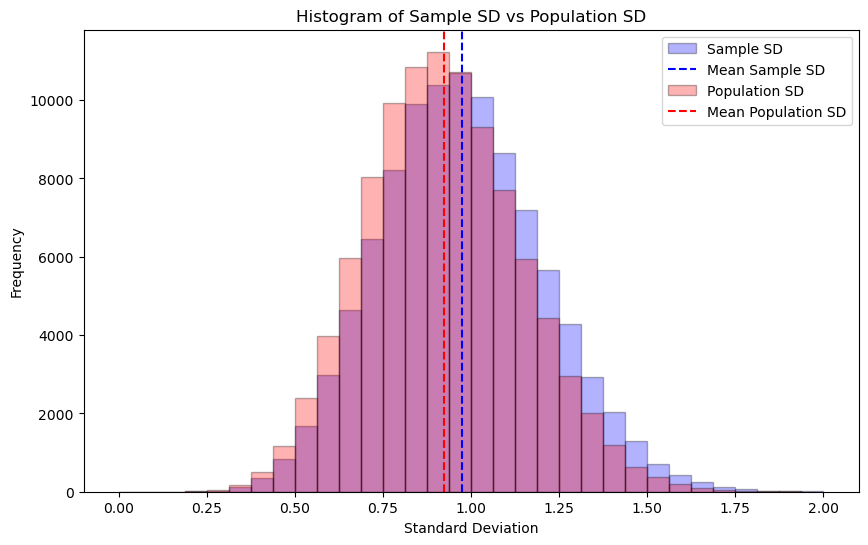

In [ ]:
# Plot of the Sample SD vs the Population SD.
fig, ax = plt.subplots(figsize = (10, 6))

# Plot the sample standard deviation.
ax.hist(sample_std_dev, alpha = 0.3, edgecolor = 'black', bins=np.linspace(0.0, 2.0, 33), color= 'blue', label = 'Sample SD')

# Plot a vertical line at the mean of the sample SD.
plt.axvline(x= np.mean(sample_std_dev), color='blue', linestyle='--', label = 'Mean Sample SD')

# Plot the population standard deviation.
ax.hist(population_std_dev, alpha = 0.3, edgecolor = 'black', bins=np.linspace(0.0, 2.0, 33), color= 'red', label = 'Population SD')

# Plot a vertical line at the mean of the population SD.
plt.axvline(x= np.mean(population_std_dev), color='red', linestyle='--', label = 'Mean Population SD')

# Label the title, axis labels and legend.
plt.title('Histogram of Sample SD vs Population SD')
plt.ylabel('Frequency')
plt.xlabel('Standard Deviation')
ax.legend()

# Display the plot
plt.show()

In [ ]:
np.mean(sample_std_dev)

0.9727697676329791

In [15]:
np.mean(population_std_dev)

0.9228504314018866

* Describe the differences. 

The plot shows that the mean of the population standard deviation, $\mu$ = 0.92 is smaller than the mean of the sample standard deviation, $\mu$ = 0.97. This difference is expected as the sample standard deviation is a biased estimator of the population standard deviation. Sample standard deviations tend to be slightly larger on average because they rely on limited data and therefore introduce additional variability. The sample mean, $\overline{x}$ tends to be smaller than the population mean, $\mu$.

* Explain how you expect these differences to change if the sample size is increased.

For this problem 100,000 samples of size 10 were generated. If the sample size was increased, the sample standard deviation would get closer and closer to the population standard deviation.

__Sample Standard Deviation__

$$s = \sqrt\frac{\sum\limits_{i=1}^{N}(x_i - \overline{x})^2}{N - 1}$$

Where:

- $s$ = sample standard deviation
- $x_i$ = each data point
- $\overline{x}$ = sample mean
- $N$ = total number of data points


The formula for sample standard deviation divides by $N-1$, Bessel's correction. With a larger the number of samples, $N$, the smaller the correction effect of $N-1$. 

Also as the sample size gets larger, the sample mean, $\overline{x}$ gets closer to the true population mean, $\mu$,. When the mean is estimated more accurately, the deviations from the mean are computed more accurately, which leads to the sample standard deviation to be a better approximate the population standard deviation.

## Problem 3: t-Tests

__Brief__: A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference _d_ = 0, 0.1, 0.2, …, 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean _d_ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
   
Plot this proportion against _d_, and explain how the type II error rate changes as the difference in means increases.

## Problem 4: ANOVA

__Brief__: Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.
   
Write a short note on why ANOVA is preferred over running several t-tests.

End
***